<div class="alert alert-block alert-info">

<b>Thank you for contributing to TeachOpenCADD!</b>

</div>

<div class="alert alert-block alert-info">

<b>Set up your PR</b>: Please check out our <a href="https://github.com/volkamerlab/teachopencadd/issues/41">issue</a> on how to set up a PR for new talktorials, including standard checks and TODOs.

</div>

# T001 · Scaffold-Based data split
Authors:

- Vahid Atabaigielmi, CADD seminar 2023, Volkamer lab, Center for Bioinformatics, Saarland University
- First and last name, year(s) of contribution, lab, institution

*The examples used in this talktorial template are taken from [__Talktorial T001__](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T001_query_chembl/talktorial.ipynb) and [__Talktorial T002__](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T002_compound_adme/talktorial.ipynb).*

<div class="alert alert-block alert-info">

<b>Cross-referencing talktorials</b>: If you want to cross-reference to existing talktorials in your notebook, please use the following formatting: <b>Talktorial T000</b>.

</div>

## Aim of this talktorial

The aim of this talktorial is to to experiment with different scaffold_based splitting strategies and evaluate the performance of the GCNN model on  test sets to determine the most appropriate splitting approach.

### Contents in *Theory*

_Add Table of Contents (TOC) for Theory section._

* ChEMBL database
* Data spliting methods
> * Random based spliting
> * Murcko Scaffold based spliting
> * Scaffold_Cluster based splitting
* Overview of Tanimoto Similarity



<div class="alert alert-block alert-info">

<b>Sync TOC with section titles</b>: These points should refer to the headlines of your <i>Theory</i> section.

</div>

### Contents in *Practical*

_Add Table of Contents (TOC) for Practical section._

* Connect to ChEMBL database
* Load and the Data
* Convert the canonical smiles to RDKit molecules
* Tanimoto similarity function
* Perform Murcko scaffold based spliting
* Perform the random split
* perform Scaffold_Cluster based splitting
* Calculates the Tanimoto similarity between training and test sets
* Plot trainng and test sets

<div class="alert alert-block alert-info">

<b>Sync TOC with section titles</b>: These points should refer to the headlines of your <i>Practical</i> section.

</div>

### References

* Paper 
* Tutorial links
* Other useful resources

*We suggest the following citation style:*
* Keyword describing resource: <i>Journal</i> (year), <b>volume</b>, pages (link to resource) 

*Example:*
* ChEMBL web services: [<i>Nucleic Acids Res.</i> (2015), <b>43</b>, 612-620](https://academic.oup.com/nar/article/43/W1/W612/2467881) 

## Theory

### Overview of Tanimoto Similarity
The Tanimoto algorithm states that A and B are sets of fingerprint “bits” within the fingerprints of molecule A and molecule B. AB is defined as the set of common bits of fingerprints of both molecule A and B. The resulting Tanimoto coefficient (or T(A,B)) ranges from 0, when the fingerprints have no bits in common, to 1, when the fingerprints are identical. Thus,

T(A,B) = (A ∩ B)/(A + B - A ∩ B)

The chemical similarity problem then becomes, Given molecule A, find all formulas that have a Tanimoto coefficient greater than a given threshold. The greater the value of a set threshold, the more similar the molecules are.

<div class="alert alert-block alert-info">

<b>Sync section titles with TOC</b>: Please make sure that all section titles in the <i>Theory</i> section are synced with the bullet point list provided in the <i>Aim of this talktorial</i> > <i>Contents in Theory</i> section.

</div>


<div class="alert alert-block alert-info">
    
<b>Beware of section levels</b>: Please check if you are using the correct subsection levels. The section <i>Theory</i> is written in Markdown as <code>## Theory</code>, so every subsection within <i>Theory</i> is <code>###</code> or lower.

</div>

### ChEMBL database

Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam erat, sed diam voluptua. At vero eos et accusam et justo duo dolores et ea rebum. Stet clita kasd gubergren, no sea takimata sanctus est Lorem ipsum dolor sit amet. Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam erat, sed diam voluptua. At vero eos et accusam et justo duo dolores et ea rebum. Stet clita kasd gubergren, no sea takimata sanctus est Lorem ipsum dolor sit amet.

![ChEMBL web service schema](./images/example_plot.png)

*Figure 1:* 
Describe figure and add reference.
Figure and description taken from: [<i>Nucleic Acids Res.</i> (2015), <b>43</b>, 612-620](https://academic.oup.com/nar/article/43/W1/W612/2467881).

<div class="alert alert-block alert-info">
    
<b>Figures</b>: Place images in the <code>images/</code> folder and include them using Markdown <code>![Figure title](images/some_figure.jpg)</code>. Add a figure caption in the format shown in the example.

</div>

<div class="alert alert-block alert-info">
    
<b>Formulas</b>: Please use LaTeX to format formulas.
</div>

If you place links, please link descriptive words.

> __Yes__: [ChEMBL](https://www.ebi.ac.uk/chembl/) is a manually curated database of bioactive molecules

> __No__: ChEMBL ([here](https://www.ebi.ac.uk/chembl/)) is a manually curated database of bioactive molecules

<div class="alert alert-block alert-info">
    
<b>Links</b>: If you place links, please link descriptive words.

</div>

## Practical

### Import all the necessary libraries

In [1]:
import math
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from chembl_webresource_client.new_client import new_client
# Rdkit
from rdkit import Chem
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.DataStructs import FingerprintSimilarity
from rdkit.Chem import Descriptors, Draw, PandasTools, MolFromSmiles, MolToSmiles
# DataSAIL
import datasail.reader.read_molecules
from datasail.reader.utils import DataSet
from datasail.cluster.ecfp import run_ecfp
from datasail.reader.utils import read_csv, DataSet, read_data

In [2]:
# Set path to this notebook
HERE = Path(_dh[-1])
DATA = HERE / "output2500.tsv"

### Connect to ChEMBL database

In [ ]:
targets_api = new_client.target
uniprot_id = "P00533"
targets = targets_api.get(target_components__accession=uniprot_id).only("target_chembl_id", "organism", "pref_name", "target_type")
targets = pd.DataFrame.from_records(targets)
target = targets.iloc[0]
chembl_id = target.target_chembl_id
required_features = ['molecule_chembl_id','canonical_smiles', 'standard_value']
res = new_client.activity.filter(target_chembl_id=chembl_id,standard_type="IC50").only(*required_features)[:3000]
# Create a DataFrame from the results
data = [
    [
        item.get('molecule_chembl_id'),
        item.get('canonical_smiles'),
        item.get('standard_value'),
    ]
    for item in res
]
df = pd.DataFrame(data, columns=['molecule_chembl_id', 'canonical_smiles','IC50'])
print(df)
df.to_csv('output3000.tsv', sep='\t', index=False)
# Print the DataFrame
print(df.head())

 ### Loud the Data

In [ ]:
data = pd.read_csv('output2500.tsv', sep='\t')
data['IC50'].replace('', np.nan, inplace=True)
data.dropna(subset=['IC50'], inplace=True)
data['IC50'] = data['IC50'].apply(lambda x: - math.log(x/1000000))
data = data.rename(columns={'IC50': 'pIC50'})

### Convert the canonical smiles to RDKit molecules

In [4]:
data['Molecule'] = data['canonical_smiles'].apply(Chem.MolFromSmiles)
# Generate molecular scaffolds
data['Scaffolds'] = data['Molecule'].apply(lambda mol: Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(mol)))
data['Molecule_SCF'] = data['Scaffolds'].apply(Chem.MolFromSmiles)
data.head()

,molecule_chembl_id,canonical_smiles,pIC50,Molecule,Scaffolds,Molecule_SCF
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,10.101938,<rdkit.Chem.rdchem.Mol object at 0x148920740>,O=C1Nc2ncnc(Nc3ccccc3)c2/C1=C/c1ccc[nH]1,<rdkit.Chem.rdchem.Mol object at 0x148922030>
1,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,8.111728,<rdkit.Chem.rdchem.Mol object at 0x148920510>,O=C1Nc2ncnc(Nc3ccccc3)c2/C1=C/c1ccc[nH]1,<rdkit.Chem.rdchem.Mol object at 0x148c45f50>
2,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,4.851071,<rdkit.Chem.rdchem.Mol object at 0x1489204a0>,O=C1Nc2ncnc(Nc3ccccc3)c2/C1=C/c1ccc[nH]1,<rdkit.Chem.rdchem.Mol object at 0x148c45fc0>
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,8.679712,<rdkit.Chem.rdchem.Mol object at 0x148920430>,O=C1Nc2ncnc(Nc3ccccc3)c2/C1=C/c1ccc(C(=O)N2CCO...,<rdkit.Chem.rdchem.Mol object at 0x148c46030>
4,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,10.126631,<rdkit.Chem.rdchem.Mol object at 0x148920350>,O=C1Nc2ncnc(Nc3ccccc3)c2/C1=C/c1ccc(C(=O)N2CCO...,<rdkit.Chem.rdchem.Mol object at 0x148c460a0>


 ### Tanimoto similarity function

In [5]:
def Tanimoto_similarity(train_fps, test_fps):
    similarities = []
    # Calculate the Tanimoto similarity for each pair of molecules
    for train_fp in train_fps:
        for test_fp in test_fps:
            similarity = FingerprintSimilarity(train_fp, test_fp)
            similarities.append(similarity)

    # Calculate the average similarity
    average_similarity = sum(similarities) / len(similarities)

    return average_similarity

### Perform Murcko scaffold based split

In [69]:
# Perform clustering based on scaffolds
clusters = data.groupby('Scaffolds').groups.values()

# Assign cluster labels to molecules
cluster_labels = {}
clusters = data.groupby('Scaffolds').groups.values()
for i, cluster in enumerate(clusters):
    for idx in cluster:
        cluster_labels[idx] = i
data['ClusterLabel'] = data.index.map(cluster_labels)
class_counts_data = dict(Counter(data['ClusterLabel']))
filtered_classes = [label for label, count in class_counts_data.items() if count >= 2]
filtered_data = data[data['ClusterLabel'].isin(filtered_classes)]
filtered_sorted_data = filtered_data.sort_values('ClusterLabel')
train_set_SCF = filtered_sorted_data[:1900]
test_set_SCF = filtered_sorted_data[1900:]
print("Shape of dataframe : ", train_set_SCF.shape)
train_set_SCF.info()
train_fps_SCF = [Chem.RDKFingerprint(mol) for mol in train_set_SCF['Molecule']]
test_fps_SCF = [Chem.RDKFingerprint(mol) for mol in test_set_SCF['Molecule']]

Shape of dataframe :  (1900, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1900 entries, 582 to 2324
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  1900 non-null   object 
 1   canonical_smiles    1900 non-null   object 
 2   pIC50               1900 non-null   float64
 3   Molecule            1900 non-null   object 
 4   Scaffolds           1900 non-null   object 
 5   Molecule_SCF        1900 non-null   object 
 6   ClusterLabel        1900 non-null   int64  
 7   SCF_FPS             1900 non-null   object 
 8   Cluster             1900 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 148.4+ KB


### Perform random split

In [70]:
train_set_RAND, test_set_RAND = train_test_split(data, test_size=0.2, random_state=42)
print("Shape of dataframe : ", train_set_RAND.shape)
train_set_RAND.info()
train_fps_RAND = [Chem.RDKFingerprint(mol) for mol in train_set_RAND['Molecule']]
test_fps_RAND = [Chem.RDKFingerprint(mol) for mol in test_set_RAND['Molecule']]

Shape of dataframe :  (1900, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1900 entries, 2178 to 881
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  1900 non-null   object 
 1   canonical_smiles    1900 non-null   object 
 2   pIC50               1900 non-null   float64
 3   Molecule            1900 non-null   object 
 4   Scaffolds           1900 non-null   object 
 5   Molecule_SCF        1900 non-null   object 
 6   ClusterLabel        1900 non-null   int64  
 7   SCF_FPS             1900 non-null   object 
 8   Cluster             1900 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 148.4+ KB


### Perfom Scaffold_Cluster based splitting

In [71]:
# Convert molecules to fingerprints
data['SCF_FPS'] = [Chem.RDKFingerprint(mol) for mol in data['Molecule_SCF']]
fps = data['SCF_FPS'].tolist()
# Perform clustering
distance_matrix = []
for i in range(1, len(fps)):
    similarities = DataStructs.BulkTanimotoSimilarity(fps[i], fps[:i])
    distance_matrix.extend([1 - similarity for similarity in similarities])
cluster_ids = Butina.ClusterData(distance_matrix, len(fps),0.8, isDistData=True)
# Step 1: Assign cluster labels to data points
data['Cluster'] = -1  # Initialize cluster labels as -1
for i, cluster in enumerate(cluster_ids):
    cluster_indices = [index for index in cluster if index < len(data)]
    cluster_indices = [index for index in cluster_indices if index in data.index]
    data.loc[cluster_indices, 'Cluster'] = i
print(data.head())

# first method
# Step 2: Split the data into training and test sets within each cluster
train_data = []
test_data = []
for cluster_id in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster_id]
    if len(cluster_data) < 2:
        continue  # Skip clusters with only one data point
    
    cluster_train, cluster_test = train_test_split(cluster_data, test_size=0.2, random_state=42)
    train_data.append(cluster_train)
    test_data.append(cluster_test)

clu_train_data = pd.concat(train_data)
clu_test_data = pd.concat(test_data)
train_fps_clu = [Chem.RDKFingerprint(mol) for mol in clu_train_data['Molecule_SCF']]
test_fps_clu = [Chem.RDKFingerprint(mol) for mol in clu_test_data['Molecule_SCF']]

#Second method
class_counts_data = dict(Counter(data['Cluster']))
filtered_classes = [label for label, count in class_counts_data.items() if count >= 2]
filtered_data = data[data['Cluster'].isin(filtered_classes)]
class_counts_data = dict(Counter(filtered_data['Cluster']))

cluster_labels=list(class_counts_data.keys())
print(cluster_labels)
cluster_train, cluster_test = train_test_split(cluster_labels, test_size=0.2, random_state=42)
# unfinished

  molecule_chembl_id                                   canonical_smiles  \
0        CHEMBL68920  Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...   
1        CHEMBL68920  Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...   
2        CHEMBL68920  Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...   
3        CHEMBL69960  Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...   
4        CHEMBL69960  Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...   

       pIC50                                       Molecule  \
0  10.101938  <rdkit.Chem.rdchem.Mol object at 0x148920740>   
1   8.111728  <rdkit.Chem.rdchem.Mol object at 0x148920510>   
2   4.851071  <rdkit.Chem.rdchem.Mol object at 0x1489204a0>   
3   8.679712  <rdkit.Chem.rdchem.Mol object at 0x148920430>   
4  10.126631  <rdkit.Chem.rdchem.Mol object at 0x148920350>   

                                           Scaffolds  \
0           O=C1Nc2ncnc(Nc3ccccc3)c2/C1=C/c1ccc[nH]1   
1           O=C1Nc2ncnc(Nc3ccccc3)c2/C1=C/c1ccc[nH]1   
2 

### Calculates the Tanimoto similarity between training and test sets

In [62]:
random_split = Tanimoto_similarity(train_fps_RAND, test_fps_RAND)
scaffold_split = Tanimoto_similarity(train_fps_SCF, test_fps_SCF)
clustring_split = Tanimoto_similarity(train_fps_clu , test_fps_clu)
print(f' Avarage similarity between traning and test sets in random split: {random_split}')
print(f' Avarage similarity between traning and test sets in Scaffold based split: {scaffold_split}')
print(f' Avarage similarity between traning and test sets in clustring based split: {clustring_split}')

 Avarage similarity between traning and test sets in random split: 0.33064598757224656
 Avarage similarity between traning and test sets in Scaffold based split: 0.2701174731809327
 Avarage similarity between traning and test sets in clustring based split: 0.2629750947374409


### Plot trainng and test sets


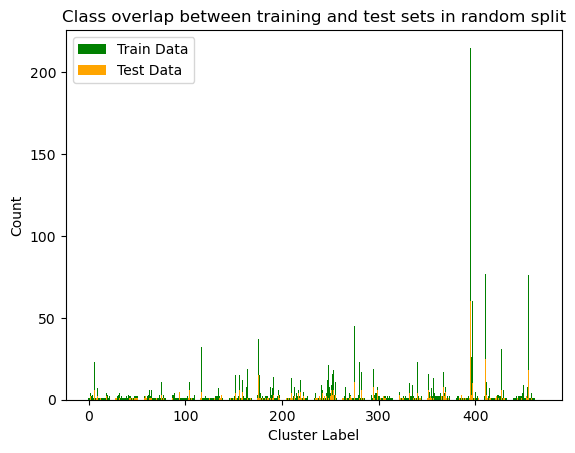

In [63]:
class_counts_train = Counter(train_set_RAND['ClusterLabel'])
class_counts_test = Counter(test_set_RAND['ClusterLabel'])

labels_test = list(class_counts_test.keys())
counts_test = list(class_counts_test.values())
labels_train = list(class_counts_train.keys())
counts_train = list(class_counts_train.values())

plt.bar(labels_train, counts_train, color='green', label='Train Data')
plt.bar(labels_test, counts_test, color='orange', label='Test Data')

plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.title('Class overlap between training and test sets in random split')
plt.legend()
plt.show()

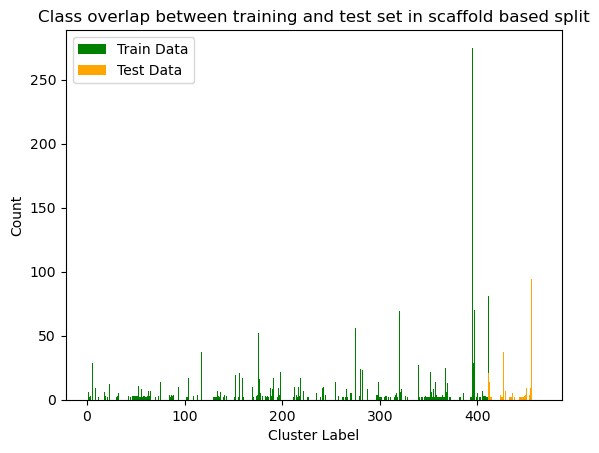

In [64]:
class_counts_train = Counter(train_set_SCF['ClusterLabel'])
class_counts_test = Counter(test_set_SCF['ClusterLabel'])

labels_test = list(class_counts_test.keys())
counts_test = list(class_counts_test.values())
labels_train = list(class_counts_train.keys())
counts_train = list(class_counts_train.values())

plt.bar(labels_train, counts_train, color='green', label='Train Data')
plt.bar(labels_test, counts_test, color='orange', label='Test Data')

plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.title('Class overlap between training and test set in scaffold based split')
plt.legend()
plt.show()

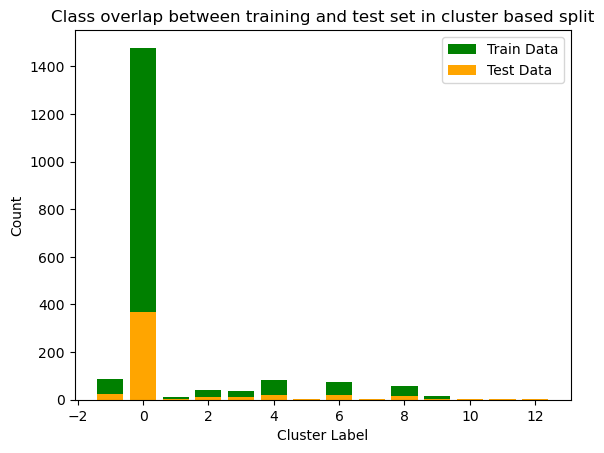

In [65]:
class_counts_train = Counter(clu_train_data['Cluster'])
class_counts_test = Counter(clu_test_data['Cluster'])

labels_test = list(class_counts_test.keys())
counts_test = list(class_counts_test.values())
labels_train = list(class_counts_train.keys())
counts_train = list(class_counts_train.values())

plt.bar(labels_train, counts_train, color='green', label='Train Data')
plt.bar(labels_test, counts_test, color='orange', label='Test Data')

plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.title('Class overlap between training and test set in cluster based split')
plt.legend()
plt.show()

### Datasail package

In [66]:
mydata = DataSet(datasail.reader.utils.read_csv('my_input.tsv'))
run_ecfp(mydata)
# having problem in implementing this package, I have tried different ways but I have gotten same error: ValueError("ECFP with Tanimoto-scores can only be applied to molecular data.")

ValueError: ECFP with Tanimoto-scores can only be applied to molecular data.

<div class="alert alert-block alert-info">

<b>Functions</b>: 

<ul>
<li>Please add <a href="https://numpydoc.readthedocs.io/en/latest/format.html">numpy docstrings</a> to your functions.</li>
<li>Please expose all variables used within a function in the function's signature (i.e. they must be function parameters), unless they are created within the scope of the function.</li>
<li>Please add comments to the steps performed in the function.</li>
<li>Please use meaningful function and parameter names. This applies also to variable names.</li>
</ul>
    
</div>

In [58]:
def calculate_ro5_properties(smiles):
    """
    Test if input molecule (SMILES) fulfills Lipinski's rule of five.

    Parameters
    ----------
    smiles : str
        SMILES for a molecule.

    Returns
    -------
    pandas.Series
        Molecular weight, number of hydrogen bond acceptors/donor and logP value
        and Lipinski's rule of five compliance for input molecule.
    """
    # RDKit molecule from SMILES
    molecule = Chem.MolFromSmiles(smiles)
    # Calculate Ro5-relevant chemical properties
    molecular_weight = Descriptors.ExactMolWt(molecule)
    n_hba = Descriptors.NumHAcceptors(molecule)
    n_hbd = Descriptors.NumHDonors(molecule)
    logp = Descriptors.MolLogP(molecule)
    # Ro5 conditions fulfilled?
    conditions = [molecular_weight <= 500, n_hba <= 10, n_hbd <= 5, logp <= 5]
    ro5_fulfilled = sum(conditions) >= 3
    # Return True if no more than one out of four conditions is violated
    return pd.Series(
        [molecular_weight, n_hba, n_hbd, logp, ro5_fulfilled],
        index=["molecular_weight", "n_hba", "n_hbd", "logp", "ro5_fulfilled"],
    )

### Load and draw molecules

_Explain what you will do and why here in the Markdown cell. This includes everything that has to do with the talktorial's storytelling._

In [5]:
# Add comments in the code cell if you want to comment on coding decisions

## Discussion

Wrap up the talktorial's content here and discuss pros/cons and open questions/challenges.

## Quiz

Ask three questions that the user should be able to answer after doing this talktorial. Choose important take-aways from this talktorial for your questions.

1. Question
2. Question
3. Question

<div class="alert alert-block alert-info">

<b>Useful checks at the end</b>: 
    
<ul>
<li>Clear output and rerun your complete notebook. Does it finish without errors?</li>
<li>Check if your talktorial's runtime is as excepted. If not, try to find out which step(s) take unexpectedly long.</li>
<li>Flag code cells with <code># TODO: CI</code> that have deterministic output and should be tested within our Continuous Integration (CI) framework.</li>
</ul>

</div>